# Use AgentPoirot for Extracting Deep Insights

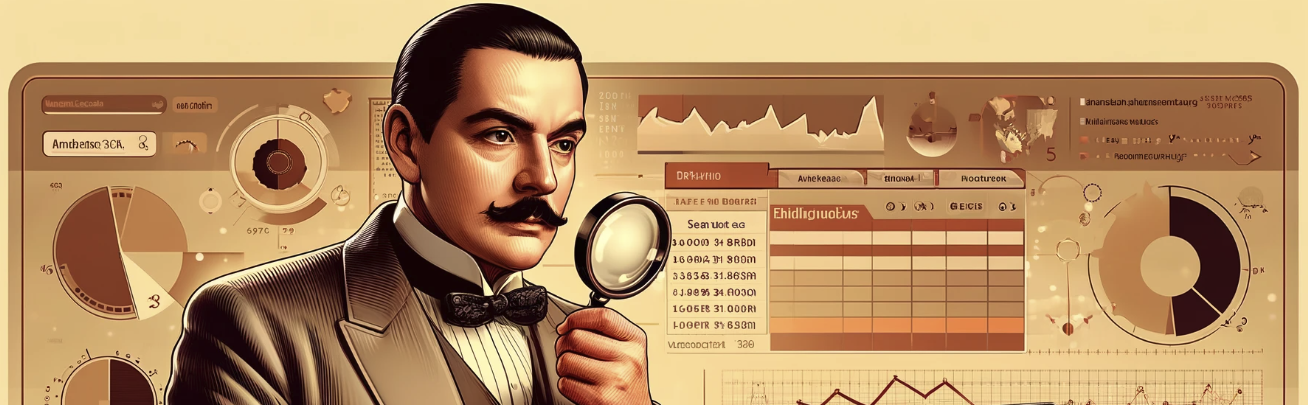

In this notebook, we will explore how to leverage AgentPoirot to extract meaningful insights from the Titanic dataset. We'll walk through the steps of setting up our environment, retrieving the dataset, creating an instance of AgentPoirot, and using it to ask questions and obtain insightful answers.

## Quick Start
- **1. Setup**
  - 1.1 Import Libraries
  - 1.2 Setup OpenAI key
- **2. Extract Insights**
  - 2.1 Get Dataset
  - 2.2 Create Agent Poirot
    - 2.2.1 Get Starting Questions
    - 2.2.2 Get Insight for a Question
    - 2.2.3 Get Follow Up Questions

In [ ]:
# (1.1) Install & Import Libraries
!pip install -q rouge_score
!pip install -q evaluate
!pip install -q openai
!pip install -q langchain_core
!pip install -q langchain
!pip install -q langchain_openai


import os

# Download CBA
if not os.path.exists("cba"):
  !mkdir cba
  !wget -q -O cba.zip https://www.dropbox.com/scl/fi/2k5znc525w7c3ts8t0q1o/cba.zip?rlkey=y7k982ol2t5362cri2ofh4p60&st=p7aj5rvr&dl=1
  !unzip -q cba.zip -d cba/

# Import Libraries
import pandas as pd
import cba
import openai
import getpass
from cba import agents

print("All libraries Imported")

In [ ]:
# (1.1) Setup OpenAI key
api_key = getpass.getpass("Please enter your OpenAI API key: ")
os.environ['OPENAI_API_KEY'] =  api_key


In [ ]:
# (2.1) Read the Titanic Dataset
df = pd.read_csv(
        "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv"
    )

df.head()

In [ ]:
# (2.2) Create Agent Poirot
agent = agents.AgentPoirot(
            df=df,
            gen_engine="gpt-4o",
            goal="I want to find interesting trends in this dataset",
            verbose=False)

In [ ]:
# (2.3) Recommend Starting Questions
questions = agent.recommend_questions(n_questions=3)

print(f"Recommended Questions by Agent Poirot\n{'-'*36}\n")
for i, q in enumerate(questions):
  print(i+1, q)

In [ ]:
# (2.4) Get Insight from the First Question
question = questions[2]


answer, insight_dict = agent.answer_question(question)

# Get relevant data
insight_object = agent.get_insight_objects(insight_dict)
display(insight_object['plot'])

print(f"Insight\n{'-'*8}\n")
print(f"Question: {question}")
print(f"Answer: {answer}")

In [ ]:
insight_object['stat']

In [ ]:
# (2.5) Recommend Followup Questions
questions = agent.recommend_questions(n_questions=3, insights_history=agent.insights_history)

print(f"Follow up Questions\n{'-'*18}\n")
for i, q in enumerate(questions):
  print(i+1, q)